In [65]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
import itertools

%matplotlib inline
np.set_printoptions(formatter={'float': '{: 0.2f}'.format})

In [4]:
file1 = Dataset("tasmin_EUR-11_MPI-M-MPI-ESM-LR_rcp85_r1i1p1_UHOH-WRF361H_v1_day_20560101-20601231.nc")

In [9]:
def print_keys(d):
    for k in d.keys():
        print(k,end=" ")
    print("")

In [31]:
def print_info(f):
    print(str(f.long_name).ljust(40)+" "+str(f.shape))

In [32]:
dims1=file1.dimensions
vars1=file1.variables

In [33]:
print_keys(vars1)

time time_bnds rlat rlon rotated_latitude_longitude lat lon lat_vertices lon_vertices height tasmin 


In [34]:
print_keys(dims1)

time rlat rlon bnds vertices 


In [92]:
print_info(vars1['time'])
print_info(vars1['rlat'])
print_info(vars1['lat'])
print_info(vars1['rlon'])
print_info(vars1['lon'])



time                                     (1827,)
latitude in rotated pole grid            (412,)
latitude coordinate                      (412, 424)
longitude in rotated pole grid           (424,)
longitude coordinate                     (412, 424)


In [90]:
vars1['lat_vertices']

<class 'netCDF4._netCDF4.Variable'>
float32 lat_vertices(rlat, rlon, vertices)
    units: degrees_north
unlimited dimensions: 
current shape = (412, 424, 4)
filling on, default _FillValue of 9.969209968386869e+36 used

In [46]:
vars1['lat_vertices']

<class 'netCDF4._netCDF4.Variable'>
float32 lat_vertices(rlat, rlon, vertices)
    units: degrees_north
unlimited dimensions: 
current shape = (412, 424, 4)
filling on, default _FillValue of 9.969209968386869e+36 used

In [86]:
vars1['lat']

<class 'netCDF4._netCDF4.Variable'>
float32 lat(rlat, rlon)
    standard_name: latitude
    long_name: latitude coordinate
    units: degrees_north
    bounds: lat_vertices
unlimited dimensions: 
current shape = (412, 424)
filling on, default _FillValue of 9.969209968386869e+36 used

In [87]:
lat1=np.array(vars1['lat'])
rlat1=np.array(vars1['rlat'])
latv1=np.array(vars1['lat_vertices'])

lon1=np.array(vars1['lon'])
rlon1=np.array(vars1['rlon'])
lonv1=np.array(vars1['lon_vertices'])

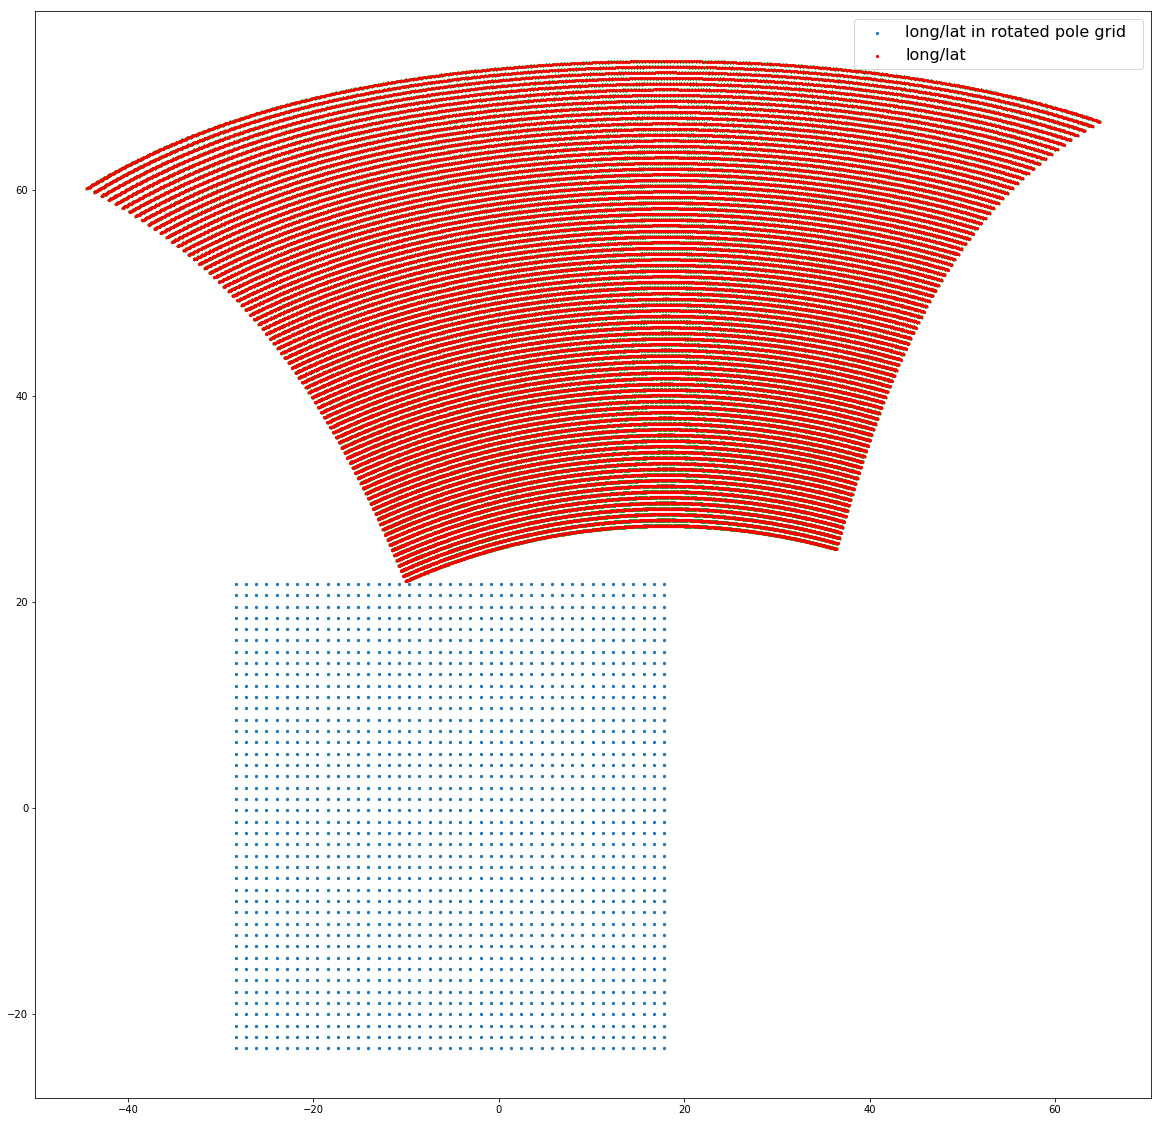

In [170]:

plt.rcParams['figure.figsize'] = [20, 20]
pts=itertools.product(rlon1[::10],rlat1[::10])
plt.scatter(*zip(*pts),s=5,label="long/lat in rotated pole grid  ")

plt.scatter(lonv1[::5],latv1[::5],s=1,color='green')
plt.scatter(lon1[::5],lat1[::5],s=5,color='red',label='long/lat')
plt.legend(prop={'size': 16})

In [128]:
from mpl_toolkits.basemap import Basemap, cm

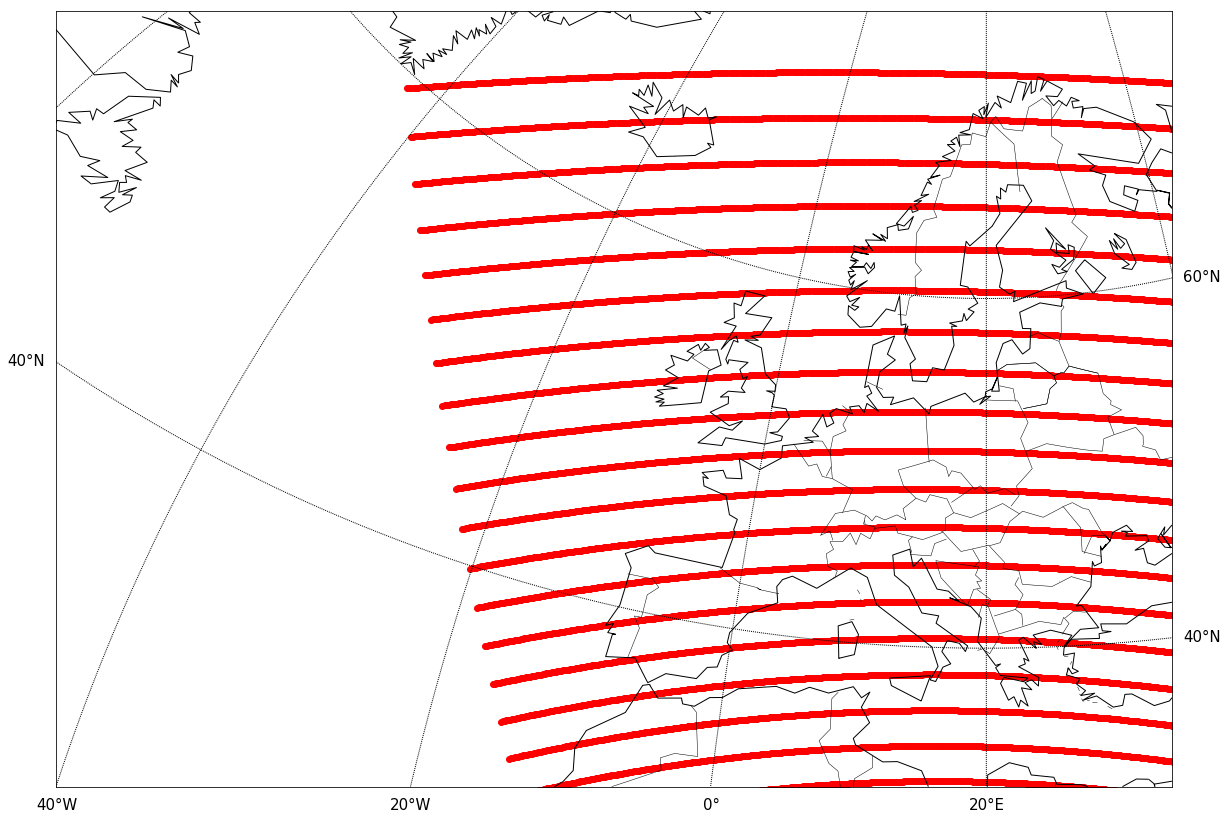

In [168]:
m=Basemap(projection='stere', lon_0=20,lat_0=10.,\
          llcrnrlon=np.min(-40),llcrnrlat=np.min(lat1), \
          urcrnrlon=np.max(50),urcrnrlat=np.max(lat1))

m.drawcoastlines()

m.drawcountries()
# draw parallels and meridians.
m.drawparallels(np.arange(-80.,81.,20.),labels=[1,1,0,0],fontsize=15)
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0,0,0,1],fontsize=15)
x,y=m(lon1[::20],lat1[::20])
m.scatter(x,y,color='red')
plt.show()

In [177]:
np.min(lat1)

21.98783

In [176]:
np.max(lat1)

72.585